# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [1]:
import pandas as pd
import numpy as np
import json
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline
#import tweepy
#from tweepy import OAuthHandler
import os
from timeit import default_timer as timer

In [2]:
# Upgrade pandas and others.
!pip install --upgrade pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Here we going to retrive the Twitter data
tw_df = pd.read_csv('twitter-archive-enhanced.csv')

tw_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Retriving the online date and getting image

urlPath = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =  requests.get(urlPath)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Loading of the image dataset
img_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

# Exploration of data in file
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'XXXX-XXXXX-XXX'
# consumer_secret = 'XXXX-XXXXX-XXX'
# access_token = 'XXXX-XXXXX-XXX'
# access_secret = 'XXXX-XXXXX-XXX'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = tw_df.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# if not os.path.isfile('tweet-json.txt'):
#     with open('tweet-json.txt', 'w') as outfile:
#         # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#         for tweet_id in tweet_ids:
#             count += 1
#             print(str(count) + ": " + str(tweet_id))
#             try:
#                 tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
#                 print("Success")
#                 json.dump(tweet._json, outfile)
#                 outfile.write('\n')
#             except tweepy.TweepError as e:
#                 print("Fail")
#                 fails_dict[tweet_id] = e
#                 pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
tweets = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_data = json.loads(line)
        tweets.append(tweet_data)

# tweet_retrive = pd.read_table('tweet-json.txt', header=None)
tweet_retrive = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])

tweet_retrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessment

#### Tweet info from Txt

In [8]:
tweet_retrive.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Image Prediction

In [9]:
img_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
img_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Twitter

In [11]:
tw_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [12]:
# Looking for nulls
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#Dataset counts source columns in the twitter_archive
tw_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
tw_df.duplicated().sum()

0

In [15]:
#Looking for unique values of each column
tw_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [16]:
tw_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Quality issues

1. Merging the all 3 dataframes(twitter_archive, image_predictions and tweet-json) into 1;

    1.1. 'tweet_id' instead of id in order to merge with the other tables.

2. Erroneous datatypes (tweet_id, timestamp, source, rating_denominator, dog_stage, rating_numerator, p1_dog, p2_dog, etc)

   2.1. Extra: "tw_df" has 2356 rows while the "img_predictions" has only 2075 rows, probably due to retweets and missing photos;
   
   2.2. Not needed columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, and
   in_reply_to_user_id)
   
   
3. Extra: "tw_df" contains 181 retweets and 78 replies which not needed.
   

4. The 'name' column contain inconsistencies like lower case senses and others;


5. Renaming "Alitta" instead of "a" as dog name;


6. Texts not readable in source columns


7. Some texts contain floof and still have 'None' as their dog stage value


### Tidiness issues
1. There are 3 dataframes, only 1 should suffice to incorporate the data we need.

2. Cleaning up and Dropping columns of merged dataframe

3. We have 3 predictions for the dog breed in the "img_predictions" but maybe the best prediction will suffice to reduce the size of the final dataframe.
4. There are 4 columns for doggo, floffer, pupper, and puppo in the "tw_df" but this is same categorical data that would be better in only 1 column.

5. Merging the Image predictions, tweet count and twitter archive tables to form a single table


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
tw_df_2 = tw_df.copy()
img_predictions_2 = img_predictions.copy()
tweet_retrive_2 = tweet_retrive.copy()

In [18]:
# Saving copied info into new files
tw_df_2.to_csv('twitter_copy.csv',encoding='utf-8',index=False)
img_predictions_2.to_csv('image_copy.csv',encoding='utf-8',index=False)
tweet_retrive_2.to_csv('json_copy.csv',encoding='utf-8',index=False)

In [19]:
# Loading cleaned data
tw_df_2 = pd.read_csv('twitter_copy.csv')
img_predictions_2 = pd.read_csv('image_copy.csv')
tweet_retrive_2 = pd.read_csv('json_copy.csv')

In [20]:
tweet_retrive_2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #1 : Merging the all 3 dataframes(twitter_archive, image_predictions and tweet-json) into 1;

#### Define: Retriving data, merging it and build new dataframe

#### Code

In [21]:
#Renaming column id inside the json dataFrame to tweet_id
tweet_retrive_2.rename(columns = {'id':'tweet_id'}, inplace = True)

In [22]:
#Verifying if the column name was replaced
tweet_retrive_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
# Merge two DataFrames(tw_df_2 & tweet_retrive_2) into one called merged_df
merged_df = pd.merge(tw_df_2, tweet_retrive_2, on=['tweet_id','tweet_id'],how='left')

In [24]:
# Merging Actual merged_df with img_predictions_2
merged_df = pd.merge(merged_df, img_predictions_2, on=['tweet_id','tweet_id'],how='left')

In [25]:
#Creating a new feature stage_dogs by extracing the values from doggo, floofer, pupper and puppo columns
merged_df['stage_dogs'] = merged_df['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)
#Dropping the doggo, floofer, pupper, and puppo columns
merged_df.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Info

In [26]:
merged_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN


### Issue #2 : Erroneous datatypes (tweet_id, timestamp, source, rating_denominator, dog_stage, rating_numerator, p1_dog, p2_dog, etc)

#### Define: Updating column data types to correct types

#### Code

In [27]:
#Updating the data types of some columns
merged_df[['rating_numerator', 'rating_denominator']] = merged_df[['rating_numerator', 'rating_denominator']].astype('float')
merged_df[['source', 'stage_dogs']] = merged_df[['source', 'stage_dogs']].astype('category')
merged_df['tweet_id'] = merged_df['tweet_id'].astype('str')
merged_df[['p1_dog', 'p2_dog', 'p3_dog']] = merged_df[['p1_dog', 'p2_dog', 'p3_dog']].astype('bool')
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [29]:
merged_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'stage_dogs'],
      dtype='object')

### Issue #3: The 'name' column contain inconsistencies like lower case senses and others.

#### Code

In [30]:
#Dog Name Replacement
unknown_name = merged_df.loc[(merged_df['name'].str.islower())]
unknown_name.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,pupper
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,...,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True,NaN


In [31]:
#Extracting the inconsistent names that are in lowercases and the texts contain named
replaced_name = merged_df.loc[(merged_df['name'].str.islower()) & (merged_df['text'].str.contains('named'))]
replaced_name.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,...,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True,NaN
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,...,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True,NaN
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,...,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False,NaN


In [32]:
#Extracting the inconsistent names that are in lowercases and the texts contain name is
actual_name = merged_df.loc[(merged_df['name'].str.islower()) & (merged_df['text'].str.contains('name is'))]
actual_name.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,...,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True,NaN
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,...,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True,NaN


In [33]:
# Change to lists
unknown_list = unknown_name['text'].tolist()
named_list = replaced_name['text'].tolist()
actual_list = actual_name['text'].tolist()

#For loop to iterate through named_list and nameis_list and replace the lowercase letter names with their correct names using 
#regex functions to extract the names from texts
for named in named_list:
    var = merged_df.text == named
    merged_df.loc[var, 'name'] = re.findall(r"named\s(\w+)", named)

    
for nameis in actual_list:
    var = merged_df.text == nameis
    merged_df.loc[var, 'name'] = re.findall(r"name is\s(\w+)", nameis)    

# For loop to iterate through unknown_names_list and replace lowercase letter names with the word "None"
for unknown_names in unknown_list:
    var = merged_df.text == unknown_names
    merged_df.loc[var, 'name'] = "None"

#### Test

In [34]:
#Checking the value counts of the dog name feature
merged_df.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

In [35]:
#Checking whether the names were correctly replaced
merged_df.loc[(merged_df['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs


### Issue #4: Renaming "Alitta" instead of "a" as dog name

#### Code

In [36]:
#Looking for the row where dog name is "a"
merged_df.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs


In [37]:
#Changing the dog name from "a" to "Alitta"
merged_df['name'] = merged_df['name'].replace('a', "Alitta")

#### Test

In [38]:
#Confirm if the function have worked
merged_df.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs


### Issue #5: Texts not readable in source columns

#### Code

In [39]:
# We will going hide a link tag to show a correct text string
merged_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
#Using arrays to refactor a column source name
retrived_source = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                   '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                   '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                   '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
to_replace_with = ['Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck']

In [41]:
#Foreaching data collection and replacing data
merged_df.source.replace(retrived_source, to_replace_with, inplace = True)

#### Test

In [42]:
merged_df.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Some texts contain floof and still have 'None' as their dog stage value

#### Code

In [43]:
merged_df.stage_dogs.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stage_dogs, dtype: int64

In [44]:
#Creating a collection texts that contains floof in it
floof_collection = ["This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp",
        "This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ",
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        "This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm",
        "This is Nimbus (like the cloud). He just bought this fancy af duck raincoat. Only protects one ear tho. 12/10 so h*ckin floofy https://t.co/SIQbb8c3AU",
        "Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q",
        'This is Heinrich (pronounced "Pat"). He\'s a Botswanian Vanderfloof. Snazzy af bandana. 12/10 downright puptacular https://t.co/G56ikYAqFg',
        "This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG",
        "Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R",
        "This is Sugar. She's a Bolivian Superfloof. Spherical af. 12/10 would never let go of https://t.co/AhMfUu6Onm",
        "This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it takes to pet https://t.co/E9jaU59bh9",
        "This is Cecil. She's a Gigglefloof Poofer. Outdoorsy af. One with nature. 12/10 would strategically capture https://t.co/ijJB0DuOIC",
        "This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW",
        "This is Fiji. She's a Powdered Stegafloof. Very rare. 12/10 https://t.co/fZRob6eotY",
        "This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Nifty shirt. Was probably on sale. Nice hardwood. 11/10 https://t.co/YoII7tWXMT",
        "This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N",
        "Say hello to Peaches. She's a Dingleberry Zanderfloof. 13/10 would caress lots https://t.co/YrhkrTsoTt",
        "Meet Luca. He's a Butternut Scooperfloof. Glorious tongue. 12/10 would pet really well https://t.co/VcxZQPNZaV",
        "This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg"]

#Command used to replace NaN with floofer for texts that have floof in them
for floof in floof_collection:
    value = merged_df.text == floof
    merged_df.loc[value, 'stage_dogs'] = "floofer"

#### Test

In [45]:
merged_df.stage_dogs.value_counts()

pupper     265
doggo       93
puppo       37
floofer     23
Name: stage_dogs, dtype: int64

### Issue #7: Cleaning up and Dropping columns of merged dataframe

#### Code

In [46]:
merged_df =  merged_df[merged_df.retweeted_status_id.isnull()]
merged_df =  merged_df[merged_df.in_reply_to_status_id.isnull()]

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   category           
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

In [48]:
# delete the columns related to retweets from the master dataframe.
merged_df = merged_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### Test

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   retweet_count       2097 non-null   float64            
 9   favorite_count      2097 non-null   float64            
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   float64            
 12  p1                  1971 non-null 

In [50]:
merged_df = merged_df[merged_df.jpg_url.notnull()]

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   category           
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1971 non-null   object             
 8   retweet_count       1971 non-null   float64            
 9   favorite_count      1971 non-null   float64            
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   float64            
 12  p1                  1971 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
merged_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index = False)

In [60]:
merged_clean = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
#Forcing datetime update after merging data
merged_clean['timestamp'] = pd.to_datetime(merged_clean['timestamp'])

In [62]:
#Making a copy of Gathered, Assessed and Cleaned Dataset
gac_df = merged_clean.copy()

In [63]:
#Adding illustrative columns for Year, Month & Day to the table
gac_df['year'] = gac_df.timestamp.apply(lambda x: x.year)
gac_df['month'] = gac_df.timestamp.dt.month_name()
gac_df['day'] = gac_df.timestamp.dt.day_name()

In [64]:
#Creating another feature rating for analysis
gac_df['rating'] = gac_df['rating_numerator'] / gac_df['rating_denominator']

In [65]:
gac_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs,year,month,day,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853.0,39467.0,...,0.085851,False,banana,0.076110,False,NaN,2017,August,Tuesday,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514.0,33819.0,...,0.090647,True,papillon,0.068957,True,NaN,2017,August,Tuesday,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328.0,25461.0,...,0.078253,True,kelpie,0.031379,True,NaN,2017,July,Monday,1.2


In [66]:
#Extracting some columns from the merged_df dataset
merged_data = gac_df[['year', 'month', 'day','timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator',
                            'rating', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog', 'stage_dogs']]
#Setting the index to year for analysis
merged_data = merged_data.set_index('year')
#Viewing the first five rows
merged_data.head()

,month,day,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,rating,p1,p1_dog,p2,p2_dog,p3,p3_dog,stage_dogs
year,,,,,,,,,,,,,,,
2017,August,Tuesday,2017-08-01 16:23:56+00:00,8853.0,39467.0,13.0,10.0,1.3,orange,False,bagel,False,banana,False,NaN
2017,August,Tuesday,2017-08-01 00:17:27+00:00,6514.0,33819.0,13.0,10.0,1.3,Chihuahua,True,Pekinese,True,papillon,True,NaN
2017,July,Monday,2017-07-31 00:18:03+00:00,4328.0,25461.0,12.0,10.0,1.2,Chihuahua,True,malamute,True,kelpie,True,NaN
2017,July,Sunday,2017-07-30 15:58:51+00:00,8964.0,42908.0,13.0,10.0,1.3,paper_towel,False,Labrador_retriever,True,spatula,False,NaN
2017,July,Saturday,2017-07-29 16:00:24+00:00,9774.0,41048.0,12.0,10.0,1.2,basset,True,English_springer,True,German_short-haired_pointer,True,NaN


### Insights:
1. Alitta is the most popular dog name.     


2. Pupper is the most popular dog stage while the least is floofer.


3. The highest rated dog is Atticus with a rating of 177.6.


4. Tweet id 822872901745569793 had the highest favorite counts of 132810 while tweet id 744234799360020481 had the highest   retweet counts of 79515.


5. Tweet id 666102155909144576 had the least favorite and retweet counts of 16 and 81 respectively.



In [67]:
#The most popular dog name
dog_name = gac_df.name.value_counts()
dog_name.head()

None       622
Charlie     11
Lucy        10
Cooper      10
Oliver      10
Name: name, dtype: int64

In [68]:
#The most popular dog stage
gac_df.stage_dogs.value_counts()

pupper     220
doggo       71
puppo       28
floofer     22
Name: stage_dogs, dtype: int64

In [69]:
#The dog with the highest rating
highest_rated_dog = gac_df[gac_df.rating == gac_df.rating.max()]
highest_rated_dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs,year,month,day,rating
722,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,2772.0,5569.0,...,0.080822,False,sunglass,0.050776,False,NaN,2016,July,Monday,177.6


In [70]:
#Tweet id with the highest retweet count
gac_df[gac_df.retweet_count == gac_df.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs,year,month,day,rating
769,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,79515.0,131075.0,...,0.044681,False,whippet,0.018442,True,doggo,2016,June,Saturday,1.3


In [71]:
#Tweet id with the highest favorite count
gac_df[gac_df.favorite_count == gac_df.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs,year,month,day,rating
306,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,48265.0,132810.0,...,0.160329,True,Irish_terrier,0.069126,True,puppo,2017,January,Saturday,1.3


In [72]:
#Tweet id with the least retweet and favorite count
gac_df[(gac_df.favorite_count == gac_df.favorite_count.min()) & (gac_df.retweet_count == gac_df.retweet_count.min())]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage_dogs,year,month,day,rating
1954,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10.0,None,16.0,81.0,...,0.149842,True,borzoi,0.133649,True,NaN,2015,November,Monday,1.1


### Visualization

### The month of December and June had the highest number of retweets and favorites count while the month of September and August had the least.

In [73]:
#Grouping the month, retweet count and favorite count for analysis
month_df = merged_data.sort_values(by='month',ascending=True).groupby('month')[['retweet_count', 'favorite_count']].sum()
month_df

,retweet_count,favorite_count
month,,
April,320884.0,1178300.0
August,232007.0,681425.0
December,837739.0,2142175.0
February,457818.0,1664466.0
January,677532.0,1965498.0
July,555022.0,2172565.0
June,616602.0,2033679.0
March,424441.0,1514301.0
May,440206.0,1561307.0


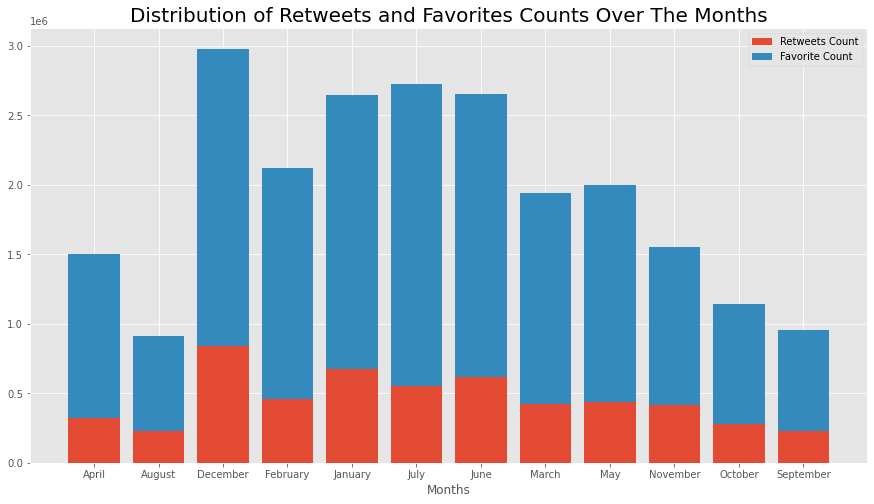

In [74]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,8))

ax.bar(month_df.index, month_df['retweet_count'], label = 'Retweets Count')
ax.bar(month_df.index, month_df['favorite_count'], bottom = month_df['retweet_count'], label = 'Favorite Count')

ax.set_xlabel('Months')
ax.set_ylabel('')
ax.legend()
plt.title('Distribution of Retweets and Favorites Counts Over The Months', fontsize = 20)
plt.show()
#Plot showing the distribution of retweets and favorites counts over the months

### The darker shade of blue is for the year 2015 while the green shade is for the year 2016 and the brighter shade of brown is for year 2017. Most of the retweets fall within the range of 0-10000 while that of favorites fall within 0 - 40000 with a few outliers. The outliers were mostly from the year 2016 and 2017.

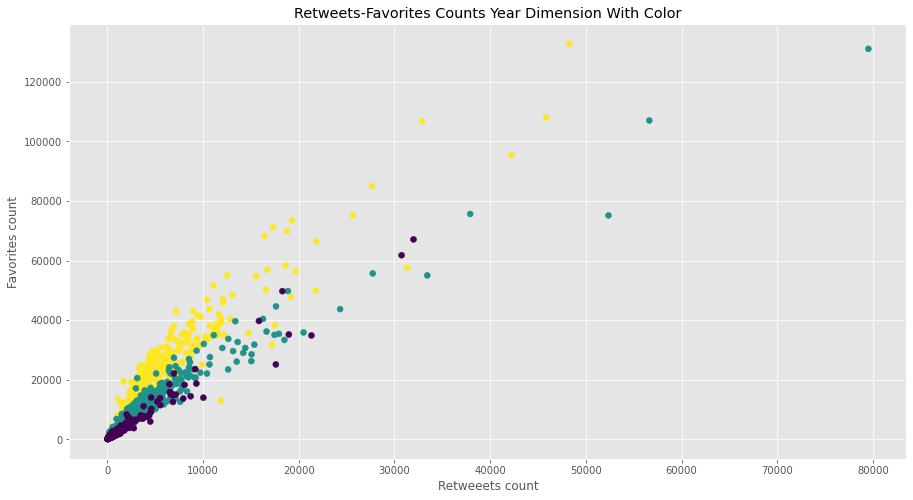

In [75]:
fig, ax = plt.subplots(figsize = (15, 8))
plt.style.use("dark_background")
ax.scatter(merged_data['retweet_count'], merged_data['favorite_count'], c = merged_data.index)
ax.set_xlabel('Retweeets count')
ax.set_ylabel('Favorites count')

plt.title('Retweets-Favorites Counts Year Dimension With Color')
plt.show()
#Plot showing the distributions of the favorites and retweeet counts with the earlier years appearing as darker shades of 
#blue and the later times appearing as brighter shades of yellow

### The ratings over the years fall within the range 0 - 2 with a few outliers. The outliers account for the unique rating system of wedogrates.

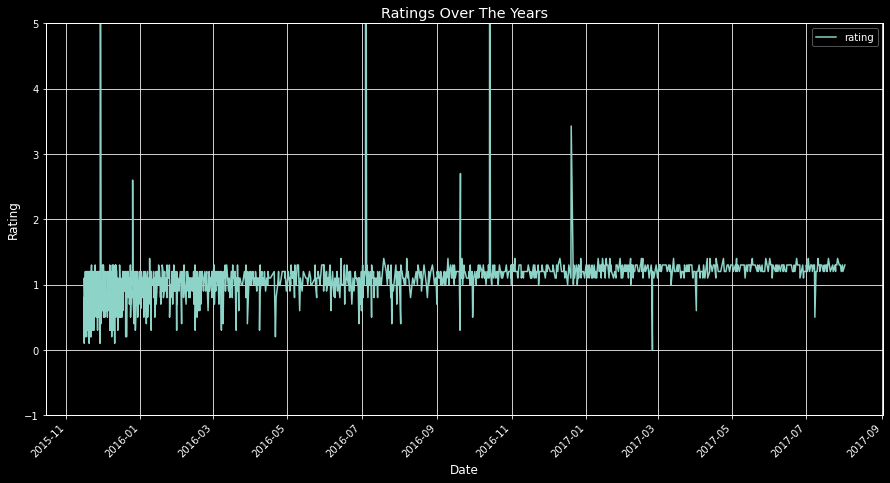

In [76]:
merged_data.plot(x='timestamp', y='rating', kind ='line', rot = 45, figsize = (15,8))
plt.ylim(-1, 5)
plt.style.use('fast')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Ratings Over The Years')
plt.show()
#plot showing the ratings over the years

### The  Labrador retriever and Golden retriever were the top dog two breeds predicted by Model A based on the favorites count from the plot.

In [77]:
#Function for grouping the dog breeds, retweet count and favorite count
def pred_dogs(pred, pred_dog):
    p_dogs = merged_data.query(pred) 
    p_dog = p_dogs.groupby(pred_dog)[['retweet_count','favorite_count']].sum().sort_values('favorite_count', ascending = False).head(10)
    return p_dog

#Function for the barh plots
def barh_plots(dog_breed, TITLE, STYLE):
    fig, ax = plt.subplots(figsize = (15,8))
    ax.barh(dog_breed.index, dog_breed['favorite_count'])
    plt.style.use(STYLE)
    ax.set_xlabel('Favorites Count', fontsize = 15)
    ax.set_ylabel('Dog breeds', fontsize = 15)
    plt.title(TITLE)
    plt.show()


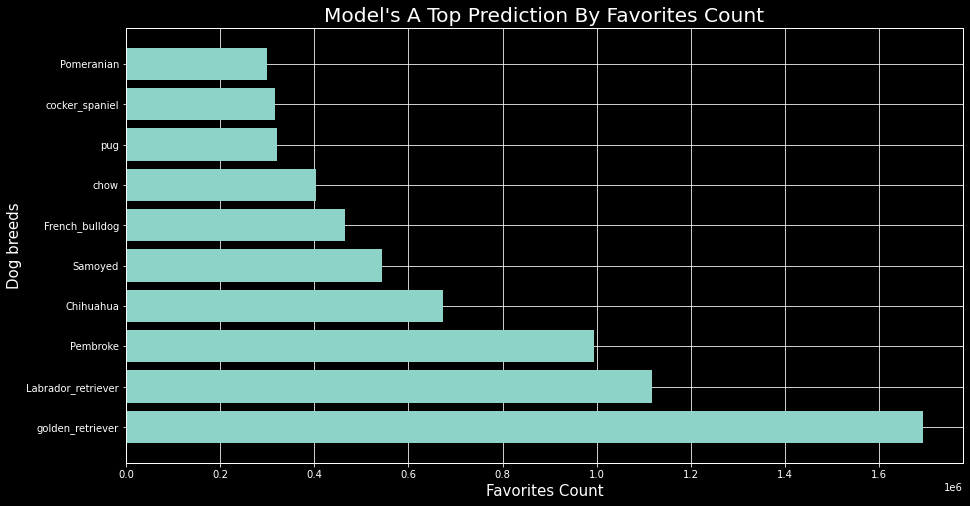

In [78]:
p1_dogs = pred_dogs('p1_dog == True', 'p1')
barh_plots(p1_dogs, "Model's A Top Prediction By Favorites Count", 'fivethirtyeight')
#Plot showing the top ten dog breeds by favorites count

### The Golden retriever and Labrador retriever were also the top two breeds predicted by Model B based on the favorites count from the plot.

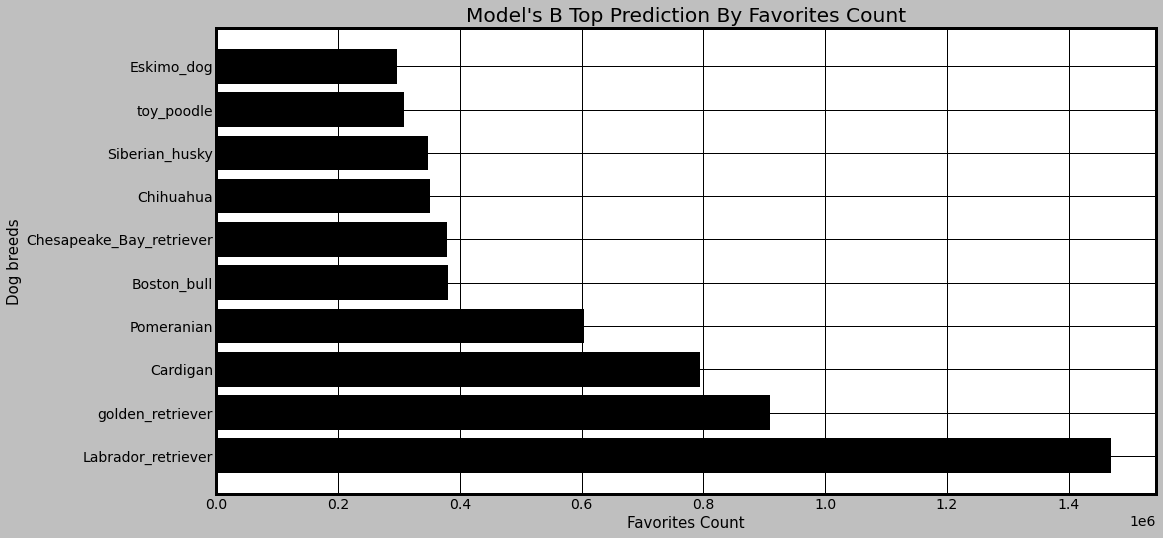

In [80]:
#Plot showing the top ten dog breeds by favorites count
p2_dogs = pred_dogs('p2_dog == True', 'p2')
barh_plots(p2_dogs, "Model's B Top Prediction By Favorites Count", 'dark_background')

### The Labrador retriever and Chihuahua were the top two breeds predicted by Model C based on the favorites count from the plot.

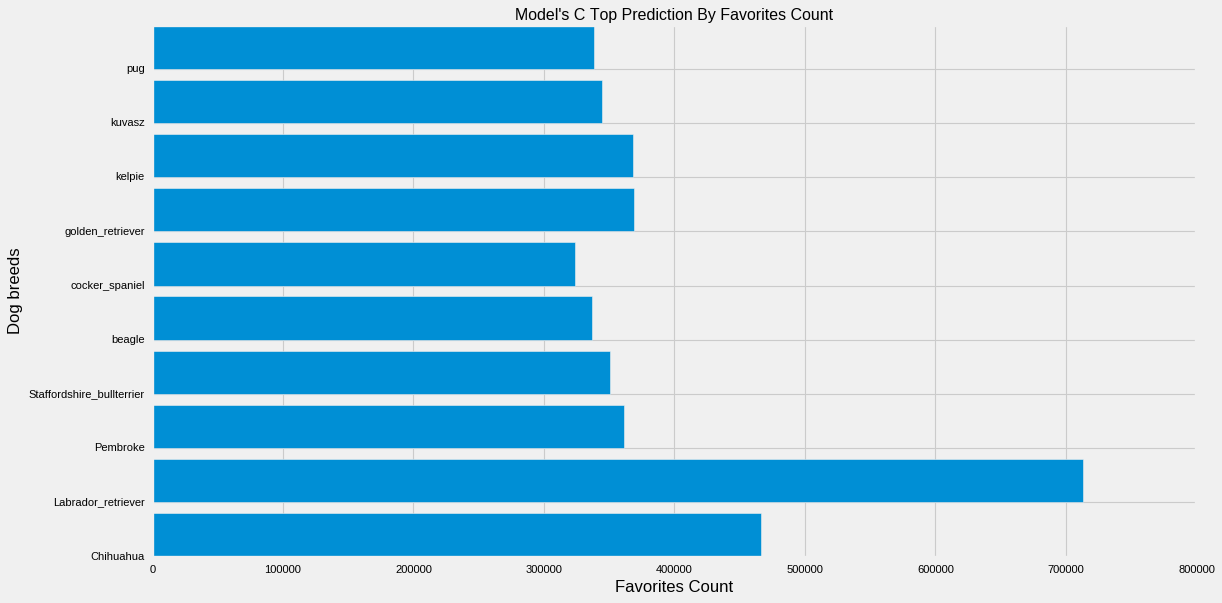

In [118]:
#Plot showing the top ten dog breeds by favorites count
p3_dogs = pred_dogs('p3_dog == True', 'p3')
barh_plots(p3_dogs, "Model's C Top Prediction By Favorites Count", 'ggplot')

### Source

1. https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
2. https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
3. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
4. https://nocodewebscraping.com/twitter-json-examples/